# Telco Customer Churn

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

## The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents.

Reference : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
#  Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split





In [2]:
# Save file path to variable
file = Path("Clean_Telco-Customer-Churn.csv")

# Read with Pandas
Churn_df = pd.read_csv(file)
Churn_df.head()

,CustomerID,Gender,LifePartner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Create DataFame
cust_churn_df = pd.DataFrame(Churn_df)
cust_churn_df

,CustomerID,Gender,LifePartner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,24,Yes,DSL,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,72,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,11,No,DSL,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,No,4,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis

## Explore the target variable
Here the target variable is "Churn"

In [4]:
# Display distribution of Churn rate
target = cust_churn_df["Churn"].value_counts().to_frame()
target 


,Churn
No,5174
Yes,1869


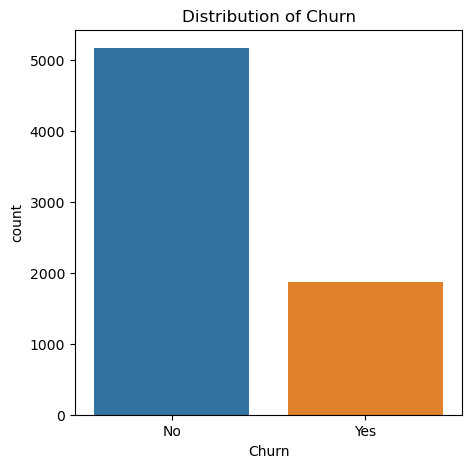

In [5]:
# plot the Churn distribution
plt.figure(figsize = (5,5))
plt.title("Distribution of Churn")
plot = sns.countplot(x = cust_churn_df["Churn"],                     
                    linewidth = 2,
                    )
plt.show()

Above plot predicts customes that left the company in the previous month. It shows imbalnce of the data between churners and non churners. Resampling would be a suitable approach. 
* Churn: No = 73%
* Churn: Yes = 26.5%



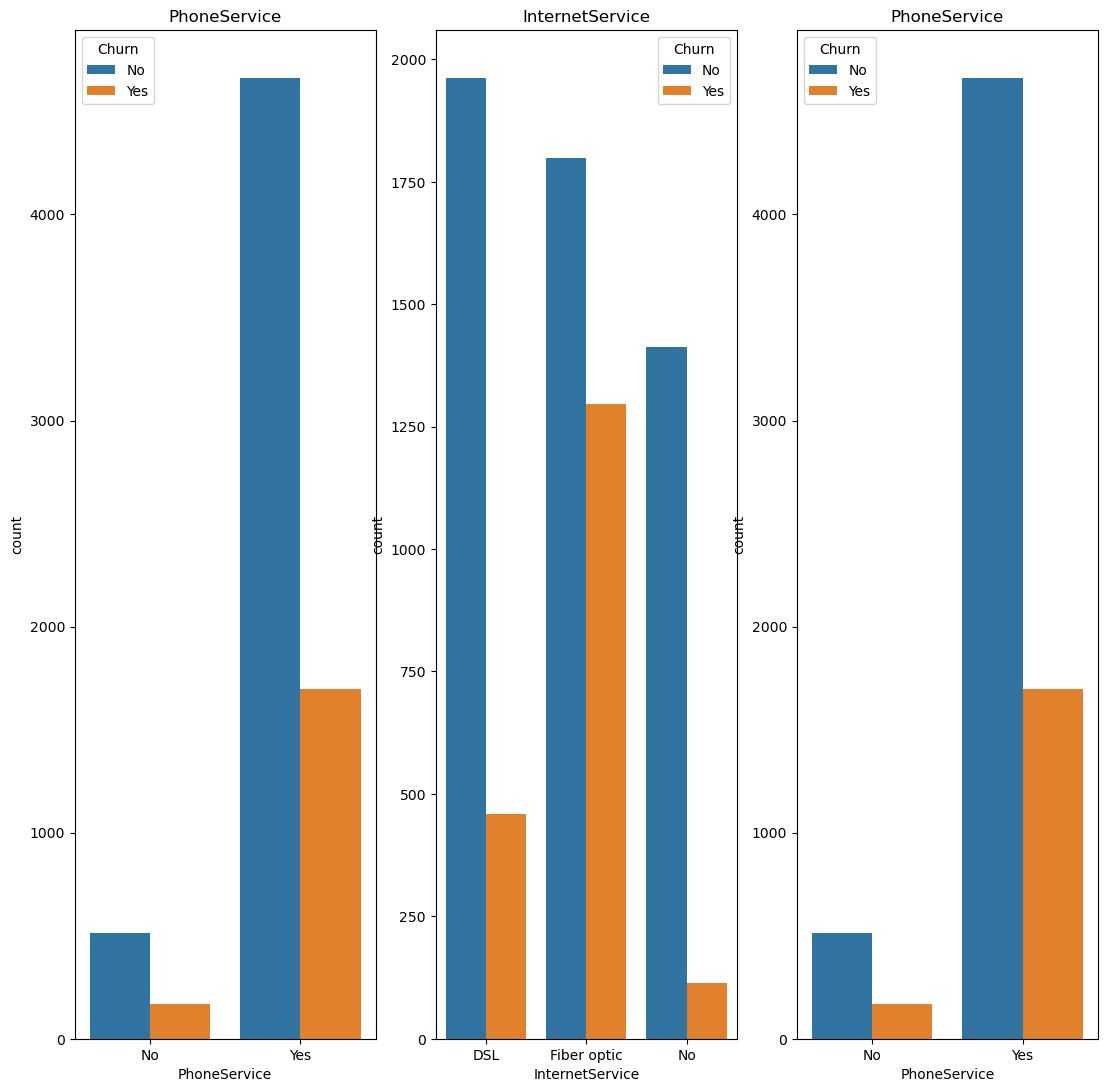

In [6]:
#import seaborn as sns
#import matplotlib.pyplot as plt

plots = {1: [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def count_plots(x, y, cust_churn_df):
    
    r = int(str(plots[len(y)][0]))
    c = int(str(plots[len(y)][1]))
            
    plt.figure(figsize=(0.1*c, 0.1*r))
    
    for i, element in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=element, hue=x, data=cust_churn_df)
        ax.set_title(element)
            
    plt.show()
            
# Generate plots
count_plots("Churn", ["PhoneService", "InternetService","PhoneService"], cust_churn_df)

In [7]:
# Drop the customer-ID 
cust_churn_df = cust_churn_df.drop(columns ="CustomerID")

# Label Encoding


In [8]:
label_encoder=LabelEncoder()
for c in cust_churn_df.columns:   ## Here c represents column
    cust_churn_df[c] = label_encoder.fit_transform(cust_churn_df[c])

cust_churn_df.head(10)

,Gender,LifePartner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,1,2,142,2505,0
1,1,0,0,34,1,0,1,0,3,498,1466,0
2,1,0,0,2,1,0,0,1,3,436,157,1
3,1,0,0,45,0,0,1,0,0,266,1400,0
4,0,0,0,2,1,1,0,1,2,729,925,1
5,0,0,0,8,1,1,0,1,2,1274,6104,1
6,1,0,1,22,1,1,0,1,1,1075,1550,0
7,0,0,0,10,0,0,0,0,3,140,2609,0
8,0,1,0,28,1,1,0,1,2,1371,2646,1
9,1,0,1,62,1,0,1,0,0,482,3022,0



# Create the labels set (y) from the “Churn” column, and then create the features (X) DataFrame from the remaining columns.

In [9]:
y=cust_churn_df["Churn"]

In [10]:
X = cust_churn_df

In [11]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [12]:
X.head()

,Gender,LifePartner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,1,2,142,2505,0
1,1,0,0,34,1,0,1,0,3,498,1466,0
2,1,0,0,2,1,0,0,1,3,436,157,1
3,1,0,0,45,0,0,1,0,0,266,1400,0
4,0,0,0,2,1,1,0,1,2,729,925,1


# Check the balance of the labels variable (y) by using the value_counts function.

In [13]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Split the data into training and testing datasets by using train_test_split

In [14]:
# Import the train_test_learn module
#from sklearn.model_selection import train_test_learn
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)


# Create a Logistic Regression Model with the Original Data
# Step 1: Fit a logistic regression model by using the training data (X_train and y_train).

In [15]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

/Users/kenuzb/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

# Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.

In [16]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,1,1


#  Evaluate the model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [17]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [18]:
#Calculate the accuracy score of the model.
logistic_acc_score = balanced_accuracy_score(y_test, predictions)
print(logistic_acc_score)

1.0


In [19]:
# Generate a confusion matrix for the model
logistic_matrix = confusion_matrix(y_test, predictions)
print(logistic_matrix)

[[1294    0]
 [   0  467]]


              precision    recall  f1-score   support

   not churn       1.00      1.00      1.00      1294
       churn       1.00      1.00      1.00       467

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761



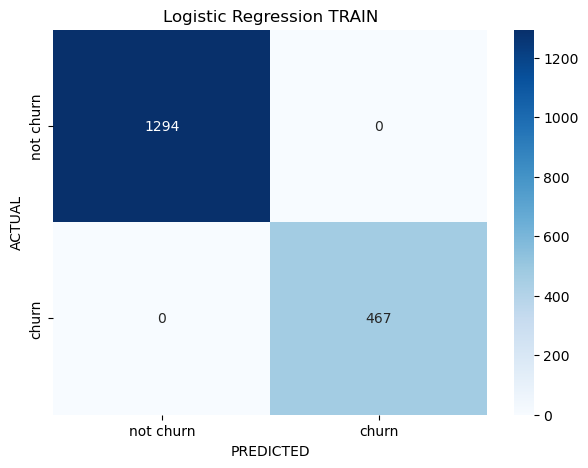

In [20]:
cm_model = confusion_matrix(y_test, predictions)

labels=["not churn", "churn"]

print(classification_report(y_test, predictions, target_names = labels))
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [21]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, au

In [23]:
print(accuracy_score(y_train,y_pred_train))

1.0


In [24]:
print(accuracy_score(y_test,y_pred_test))

1.0


In [26]:
from sklearn.ensemble import RandomForestClassifier # random forest classifier

In [27]:
forest = RandomForestClassifier(max_depth=2, random_state=101)
forest.fit(X, y)

# predict no show
y_forest_pred = forest.predict(X_test)

# calculate the accuracy score
print('Accuracy of random forest classifier: {:.2f}'.format(forest.score(X_test, y_test)))

Accuracy of random forest classifier: 0.98


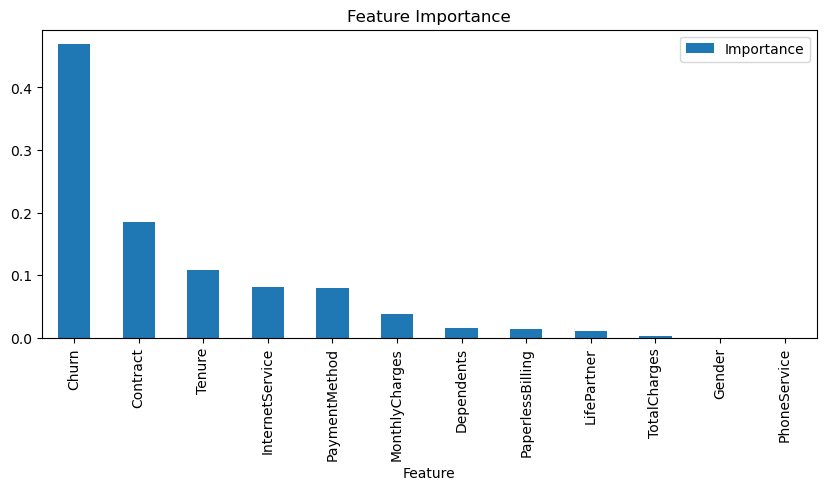

In [28]:
importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': forest.feature_importances_}).set_index('Feature').sort_values('Importance',ascending=False)

# plot the importances
importances = importances.plot(kind='bar', figsize=(10,4))
importances = importances.set_title("Feature Importance")
plt.show()

/var/folders/k3/0l0nvb7131s4m88c4gv8x6280000gn/T/ipykernel_1803/1865260837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_churn_df['Churn'])


<Axes: xlabel='Churn', ylabel='Density'>

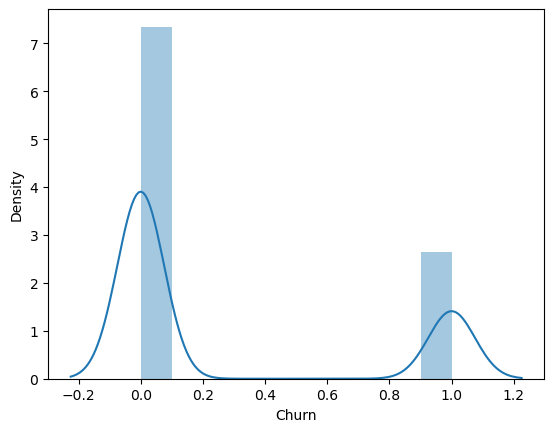

In [30]:
sns.distplot(cust_churn_df['Churn'])